In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import umap

from datasets.mnist import MNIST    
from geo import get_classified_dataset, get_class_geo_feature_beta
from app_utils import class_compress_beta

curfile_dir = os.getcwd()
dataset_dir = os.path.join(curfile_dir, "..", "dataset")
results_dir = os.path.join(curfile_dir, "results")

e:\ProgramFiles\miniconda3\envs\geo\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
e:\ProgramFiles\miniconda3\envs\geo\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
e:\ProgramFiles\miniconda3\envs\geo\Lib\site-packages\umap\distances.py:1086: NumbaDepreca

In [88]:
dataset_name = "mnist"
train_size = 10000
k = 5

mnist_train_ds = MNIST(dataset_dir, train=True, download=False)
sample_index = np.random.choice(range(train_size), train_size, replace=False)
mnist_data_arr = mnist_train_ds.data[sample_index].reshape(train_size, -1)
mnist_label_arr = mnist_train_ds.targets[sample_index]
# normalize
mnist_data_arr = (mnist_data_arr - mnist_data_arr.mean()) / mnist_data_arr.std()

classified_dataset = get_classified_dataset(mnist_data_arr, mnist_label_arr)

In [89]:
label = 0
X = classified_dataset[label]
print(f"X.shape: {X.shape}")

X.shape: (1001, 784)


In [90]:
feature = get_class_geo_feature_beta(label, X, k)


In [124]:
rate = 0.1
aegr_thres = 0.1
removed_index = class_compress_beta(X=X, feature=feature, rate=rate, aegr_thres=aegr_thres)
removed_data = X[removed_index]
res_X = np.delete(X, removed_index, axis=0)

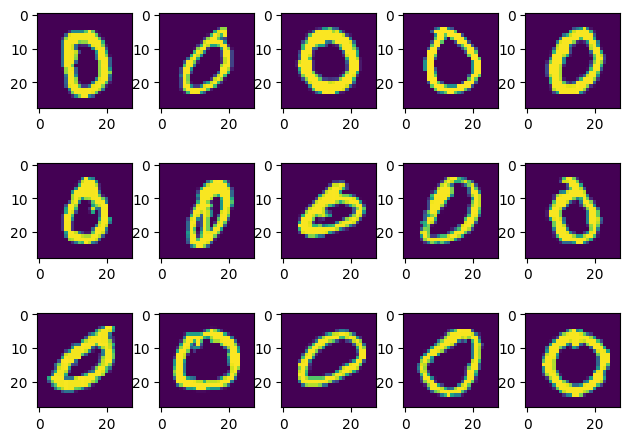

In [125]:
fig, ax_array = plt.subplots(3, 5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(res_X[i].reshape(28, 28))
plt.tight_layout(h_pad=0.5, w_pad=0.01)

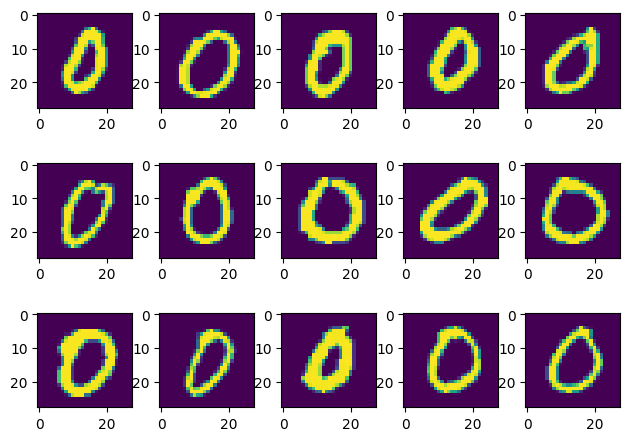

In [126]:
fig, ax_array = plt.subplots(3, 5)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(removed_data[i].reshape(28, 28))
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [127]:
print(removed_index)
print(removed_index.shape)

[305 635 459 740  39 423 923 797 609 764 403 240 862 207 832  21 354 977
 241 966 320  79 921 170 611 856  80 886  53  56 690   7 575 619 527   9
 807 744 326 480 217 914 838 749 969 701 741 123 439 562 251  97 526 918
 927 687 163 511 979 736  16 531 137  34 782 584 315 169 200 946 640 505
 308 605 657 604 686 395 915 772 232 970  51 723 917 759 367 152 219 186
 675 361 496 393 406 833 887 538 847 722]
(100,)


### dim reduce and visualize

In [128]:
reducer = umap.UMAP(random_state=42)

In [129]:
embedding = reducer.fit_transform(X)

In [130]:
res_embedding = np.delete(embedding, removed_index, axis=0)
removed_embedding = embedding[removed_index]

C:\Users\hhw\AppData\Local\Temp\ipykernel_4972\3624270360.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(res_embedding[:, 0], res_embedding[:, 1], cmap="Spectral", label="res")
C:\Users\hhw\AppData\Local\Temp\ipykernel_4972\3624270360.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(removed_embedding[:, 0], removed_embedding[:, 1], cmap="Spectral", label="removed")


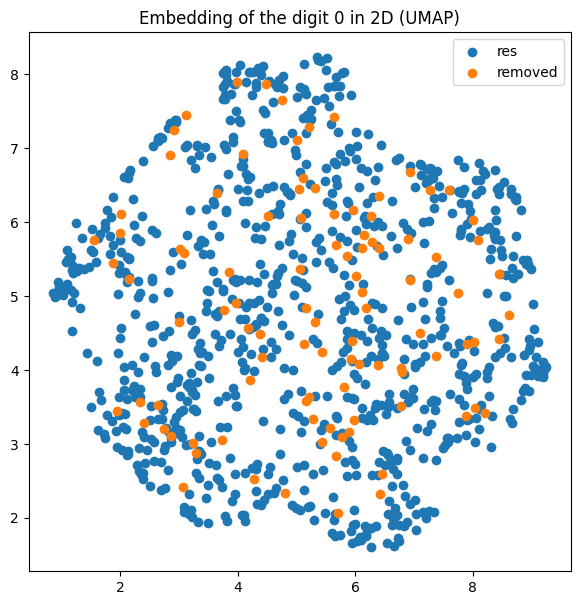

In [131]:
x = np.vstack((res_embedding, removed_embedding))
c = np.hstack([np.ones(res_embedding.shape[0]), np.zeros(removed_embedding.shape[0])])

fig, ax = plt.subplots(figsize=(7, 7))

plt.scatter(res_embedding[:, 0], res_embedding[:, 1], cmap="Spectral", label="res")
plt.scatter(removed_embedding[:, 0], removed_embedding[:, 1], cmap="Spectral", label="removed")

plt.title("Embedding of the digit 0 in 2D (UMAP)")
plt.legend()
plt.show()

In [132]:
# 画一下路径

In [133]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 沿着第一个轴（axis=0）拼接
c = np.concatenate((a, b))
print(c)  # 输出：[1 2 3 4 5 6]


[1 2 3 4 5 6]


In [134]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

# 垂直栈
c = np.vstack((a, b))
print(c)
# 输出：
# [[1 2]
#  [3 4]
#  [5 6]]

# 水平栈
d = np.hstack((a, b.T))  # 注意，为了形状匹配，这里我们对b进行了转置操作
print(d)
# 输出：
# [[1 2 5]
#  [3 4 6]]


[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]
